# Módulo 1: Análisis de datos en el ecosistema Python

### Sesión (9)

**30/10/2023**

# Random Forest Regression

Los modelos de ***Decision Tree Regression*** son capaces de encontrar la relación entre la variable objetivo y un conjunto de variables independientes, incluso cuando la relación no tiene una forma lineal (**poco sesgo/bias**).  

 El mayor desventaja de éstos métodos es que para tener una precisión aceptable suelen llegar a tener una *profundidad* considerable que les expone al peligro de ***Overfitting*** y depender demasiado de los datos entrenados, de modo que al cambiar ligeramiente los datos de entrada, se obtengan resultados muy diversos y disparados (**mucha varianza**).

## Ensemble Learning

Los métodos de *ensamble de modelos* o el **aprendizaje conjunto** intentan combinar diferentes modelos de base para mejorar el rendimiento de los modelos de _Machine Learning_ que pueden sufrir de tener errores en la predicción (_bias_) y en la confiabilidad de los resultados (_varianza_).

En otras palabras, el *Ensemble Learning* es el proceso de entrenar múltiples modelos de aprendizaje automático y combinar sus resultados para crear un modelo predictivo óptimo que genere predicciones más precisas y que tenga una mayor estabilidad.

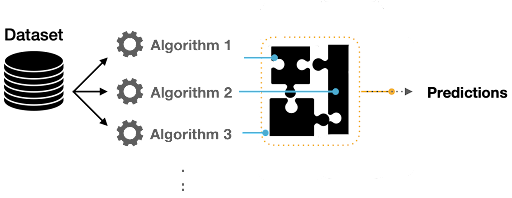

Existen diferentes enfoques para combinar los modelos de base (*base learners*) y generar un ensemble o un conjunto que sea mejor que cada uno de ellos. Los métodos de **Bagging** y **Boosting** son de los más utilizados:

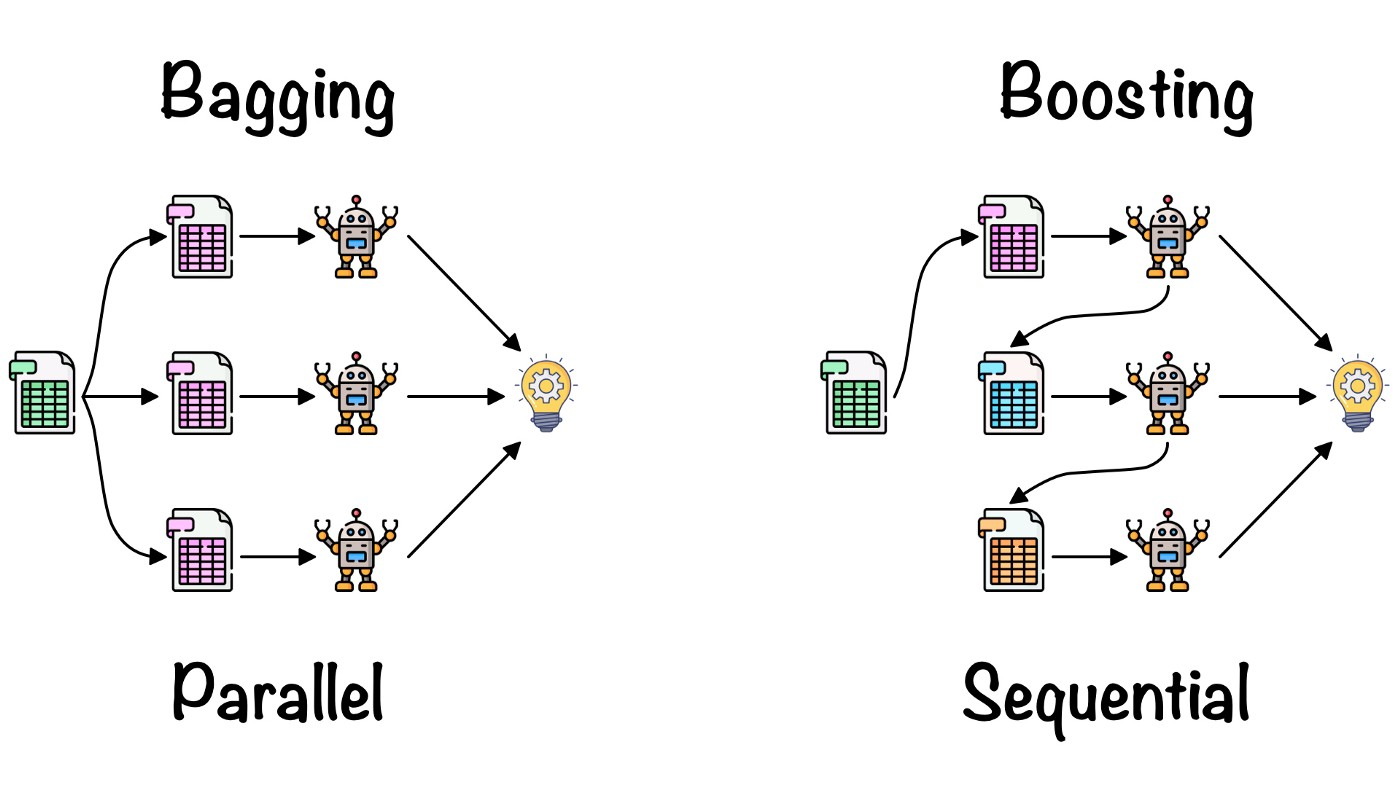

- ### **Bagging**: 
Este enfoque consiste en utilizar múltiples modelos de base que **se entrenan en paralelo** y cada uno por separado mediante un subconjunto de **muestras seleccionadas aleatoriamente y con repeticiones** del conjunto de datos de entrenamiento (***bootstrapping***). Después, se considera la media de todas las predicciones como el valor final (en caso de problemas de *Regresión*) o la clase más frecuente (en caso de problemas de *Clasificación*).

- ### **Boosting**:
La idea central detrás del enfoque de *boosting* es ajustar **secuencialmente** múltiples modelos sencillos (*weak learners*), donde cada modelo intenta mejorar o corregir los errores cometidos en el anterior. De este modo y con la implementación de varios modelos de forma secuencial, se puede conseguir una estabilidad mayor con resultados más precisos, tomando la combinación de todas las predicciones (*variables continuas*) o la clase más frecuente (*variables cualitativas/categóricas*) como la predicción final del ensemble.

## Bosque Aleatorio

Un modelo de **bosque aleatorio** o ***Random Forest*** está formado por un conjunto de árboles de decisión, cada uno entrenado con un subconjunto distinto de datos extraídos de forma aleatoria de los datos de entrenamiento originales usando la técnica de ***bootstrapping***.  

Esto quiere decir que **cada árbol se entrena en paralelo con una muestra distinta** y el valor final de una nueva observación se calcula con la media de las predicciones de todos los árboles individuales que componen el bosque.

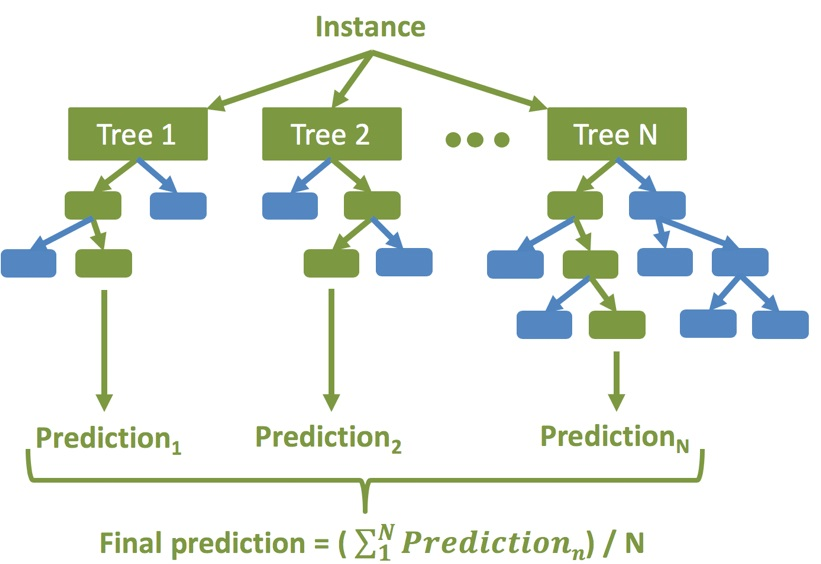

Volvemos a generar un modelo para predecir los precios de viviendas en _Boston_:

In [1]:
# importamos las librerías necesarias 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Modificamos los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 12, 6 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

### Boston housing dataset

> #### **¡Nota importante!**  
> El conjunto de datos de precios de la vivienda de _Boston_ tiene un **`problema ético`**:  
  como se investigó en [este artículo](https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8), los autores de este conjunto de datos diseñaron una variable no invertible **"B" asumiendo que la autosegregación racial tuvo un impacto positivo en los precios de la vivienda**.  
>   
>  Además, el objetivo de la investigación que condujo a la creación de este conjunto de datos fue estudiar el impacto de la calidad del aire, pero **no proporcionó una demostración adecuada de la validez de dicha suposición**.
 Por lo tanto, los mantenedores de _scikit-learn_ **desaconsejan fuertemente** el uso de este conjunto de datos a menos que el propósito del  código sea **estudiar y educar sobre cuestiones éticas** en la ciencia de datos y el aprendizaje automático. 
>  
> A partir de la *versión 1.2 de Scikit-learn* **se ha eliminado este conjunto de datos**. Sin embargo, se puede descargar en las versiones anteriores o de forma manual: 

In [3]:
# cargar el dataset de boston
df_boston = pd.read_csv("../sesion_8/dataset_boston.csv", index_col=0)
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


Características del conjunto de datos:
 
    -Número de muestras: 506
 
    -Número de atributos: 13 predictivo numérico / categórico
 
    -Median value (atributo 14) suele ser el objetivo.
    
Información de atributos (en orden):

        - CRIM tasa de delincuencia per cápita por ciudad
        - Proporción ZN de terreno residencial dividido en zonas para lotes de más de 25,000 pies cuadrados.
        - Proporción INDUS de acres comerciales no minoristas por ciudad 
        - Variable ficticia CHAS Charles River (= 1 si el tramo limita con el río; 0 en caso contrario)
        - Concentración de óxidos nítricos NOX (partes por 10 millones)
        - RM número medio de habitaciones por vivienda
        - Proporción de EDAD de las unidades ocupadas por el propietario construidas antes de 1940
        - Distancias ponderadas DIS a cinco centros de empleo de Boston
        - Índice RAD de accesibilidad a carreteras radiales
        - IMPUESTO Tasa de impuesto a la propiedad de valor total por \$ 10,000\
        - PTRATIO Ratio maestro-alumno por municipio
        - B 1000 (Bk - 0.63) ^ 2 donde Bk es la proporción de negros por ciudad
        - LSTAT % menor estatus de la población
        - MEDV Valor medio de las viviendas ocupadas por el propietario en \$ 1000\

In [4]:
# La información principal del dataset
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 59.3 KB


Definimos los datos del modelo con todas las variables de entrada **menos la variable éticamente incorrecta**


In [5]:
X_multiple = df_boston.drop(['target', 'B'], axis='columns')
y_multiple = df_boston['target']

A pesar de que es una práctica común y recomendada, esta vez no modificamos la *[estructura de datos](https://scikit-learn.org/stable/glossary.html#term-array-like)* antes de pasarlo al modelo.

In [6]:
X_multiple

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48


In [7]:
y_multiple

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: target, Length: 506, dtype: float64

In [8]:
# Dividir el dataset en Training y Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y_multiple, test_size=0.2, random_state=222)

#### Aplicar el modelo de regresión no-lineal con “Bosques Aleatorios”: **Random Forest Regressor** 

In [9]:
from sklearn.ensemble import RandomForestRegressor

bosque = RandomForestRegressor(random_state = 77)

In [10]:
# Ajustamos el algoritmo al conjunto de datos de entrenamiento

bosque.fit(X_train, y_train)

RandomForestRegressor(random_state=77)

In [11]:
# lanzamos las predicciones (para el conjunto de test que son los datos no vistos por el algoritmo en la fase de modelización)

y_pred = bosque.predict(X_test) 

#### Evaluación del modelo a través de sus métricas

In [12]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_pred)*100)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R^2 coefficient of determination:', r2_score(y_test, y_pred))

Mean Absolute Error: 2.059735294117647
Mean Absolute Percentage Error: 10.596891419462093
Mean Squared Error: 9.603638735294114
Root Mean Squared Error: 3.0989738197174423
R^2 coefficient of determination: 0.8925942216773188


A primera vista vemos que obtenemos una **buena precisión con el modelo por defecto**, comparando con métodos como *Regresión Lineal* o *Decision Tree* que se desarrollaron en sesiones anteriores. 

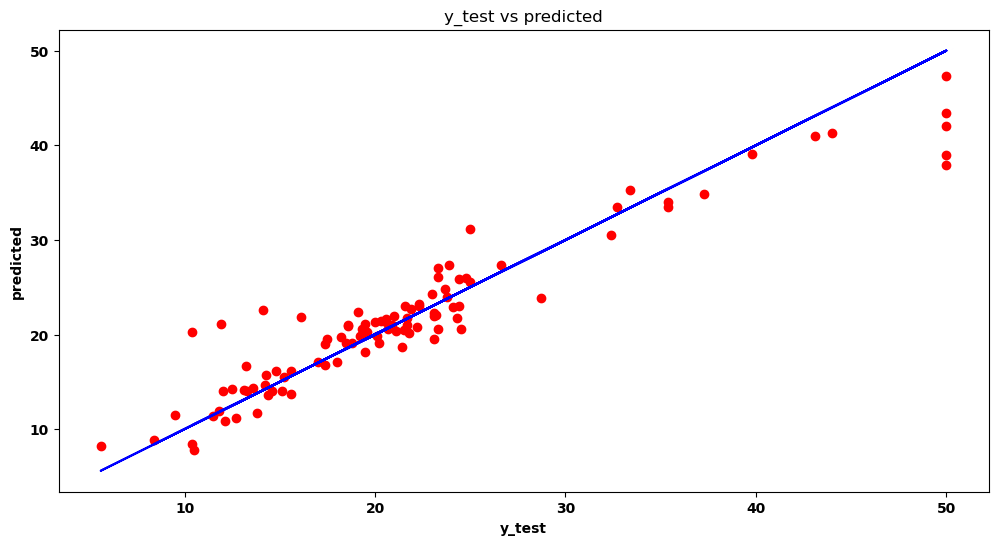

In [13]:
# visualizamos las predicciones
plt.scatter(y_test, y_pred, color = 'red')
plt.plot(y_test, y_test, color = 'blue')
plt.title('y_test vs predicted')
plt.xlabel('y_test')
plt.ylabel('predicted')
plt.show()

Vamos a obtener más información acerca del modelo:

In [14]:
print("El número de los árboles que forman el bosque:", bosque.n_estimators)

El número de los árboles que forman el bosque: 100


In [15]:
# Parámetros indicados en la definicón del bosque
bosque.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 77,
 'verbose': 0,
 'warm_start': False}

Para visualizar el contenido del bosque aleatorio, podemos **graficar alguno de los árboles de regresión** utilizados en el modelo:

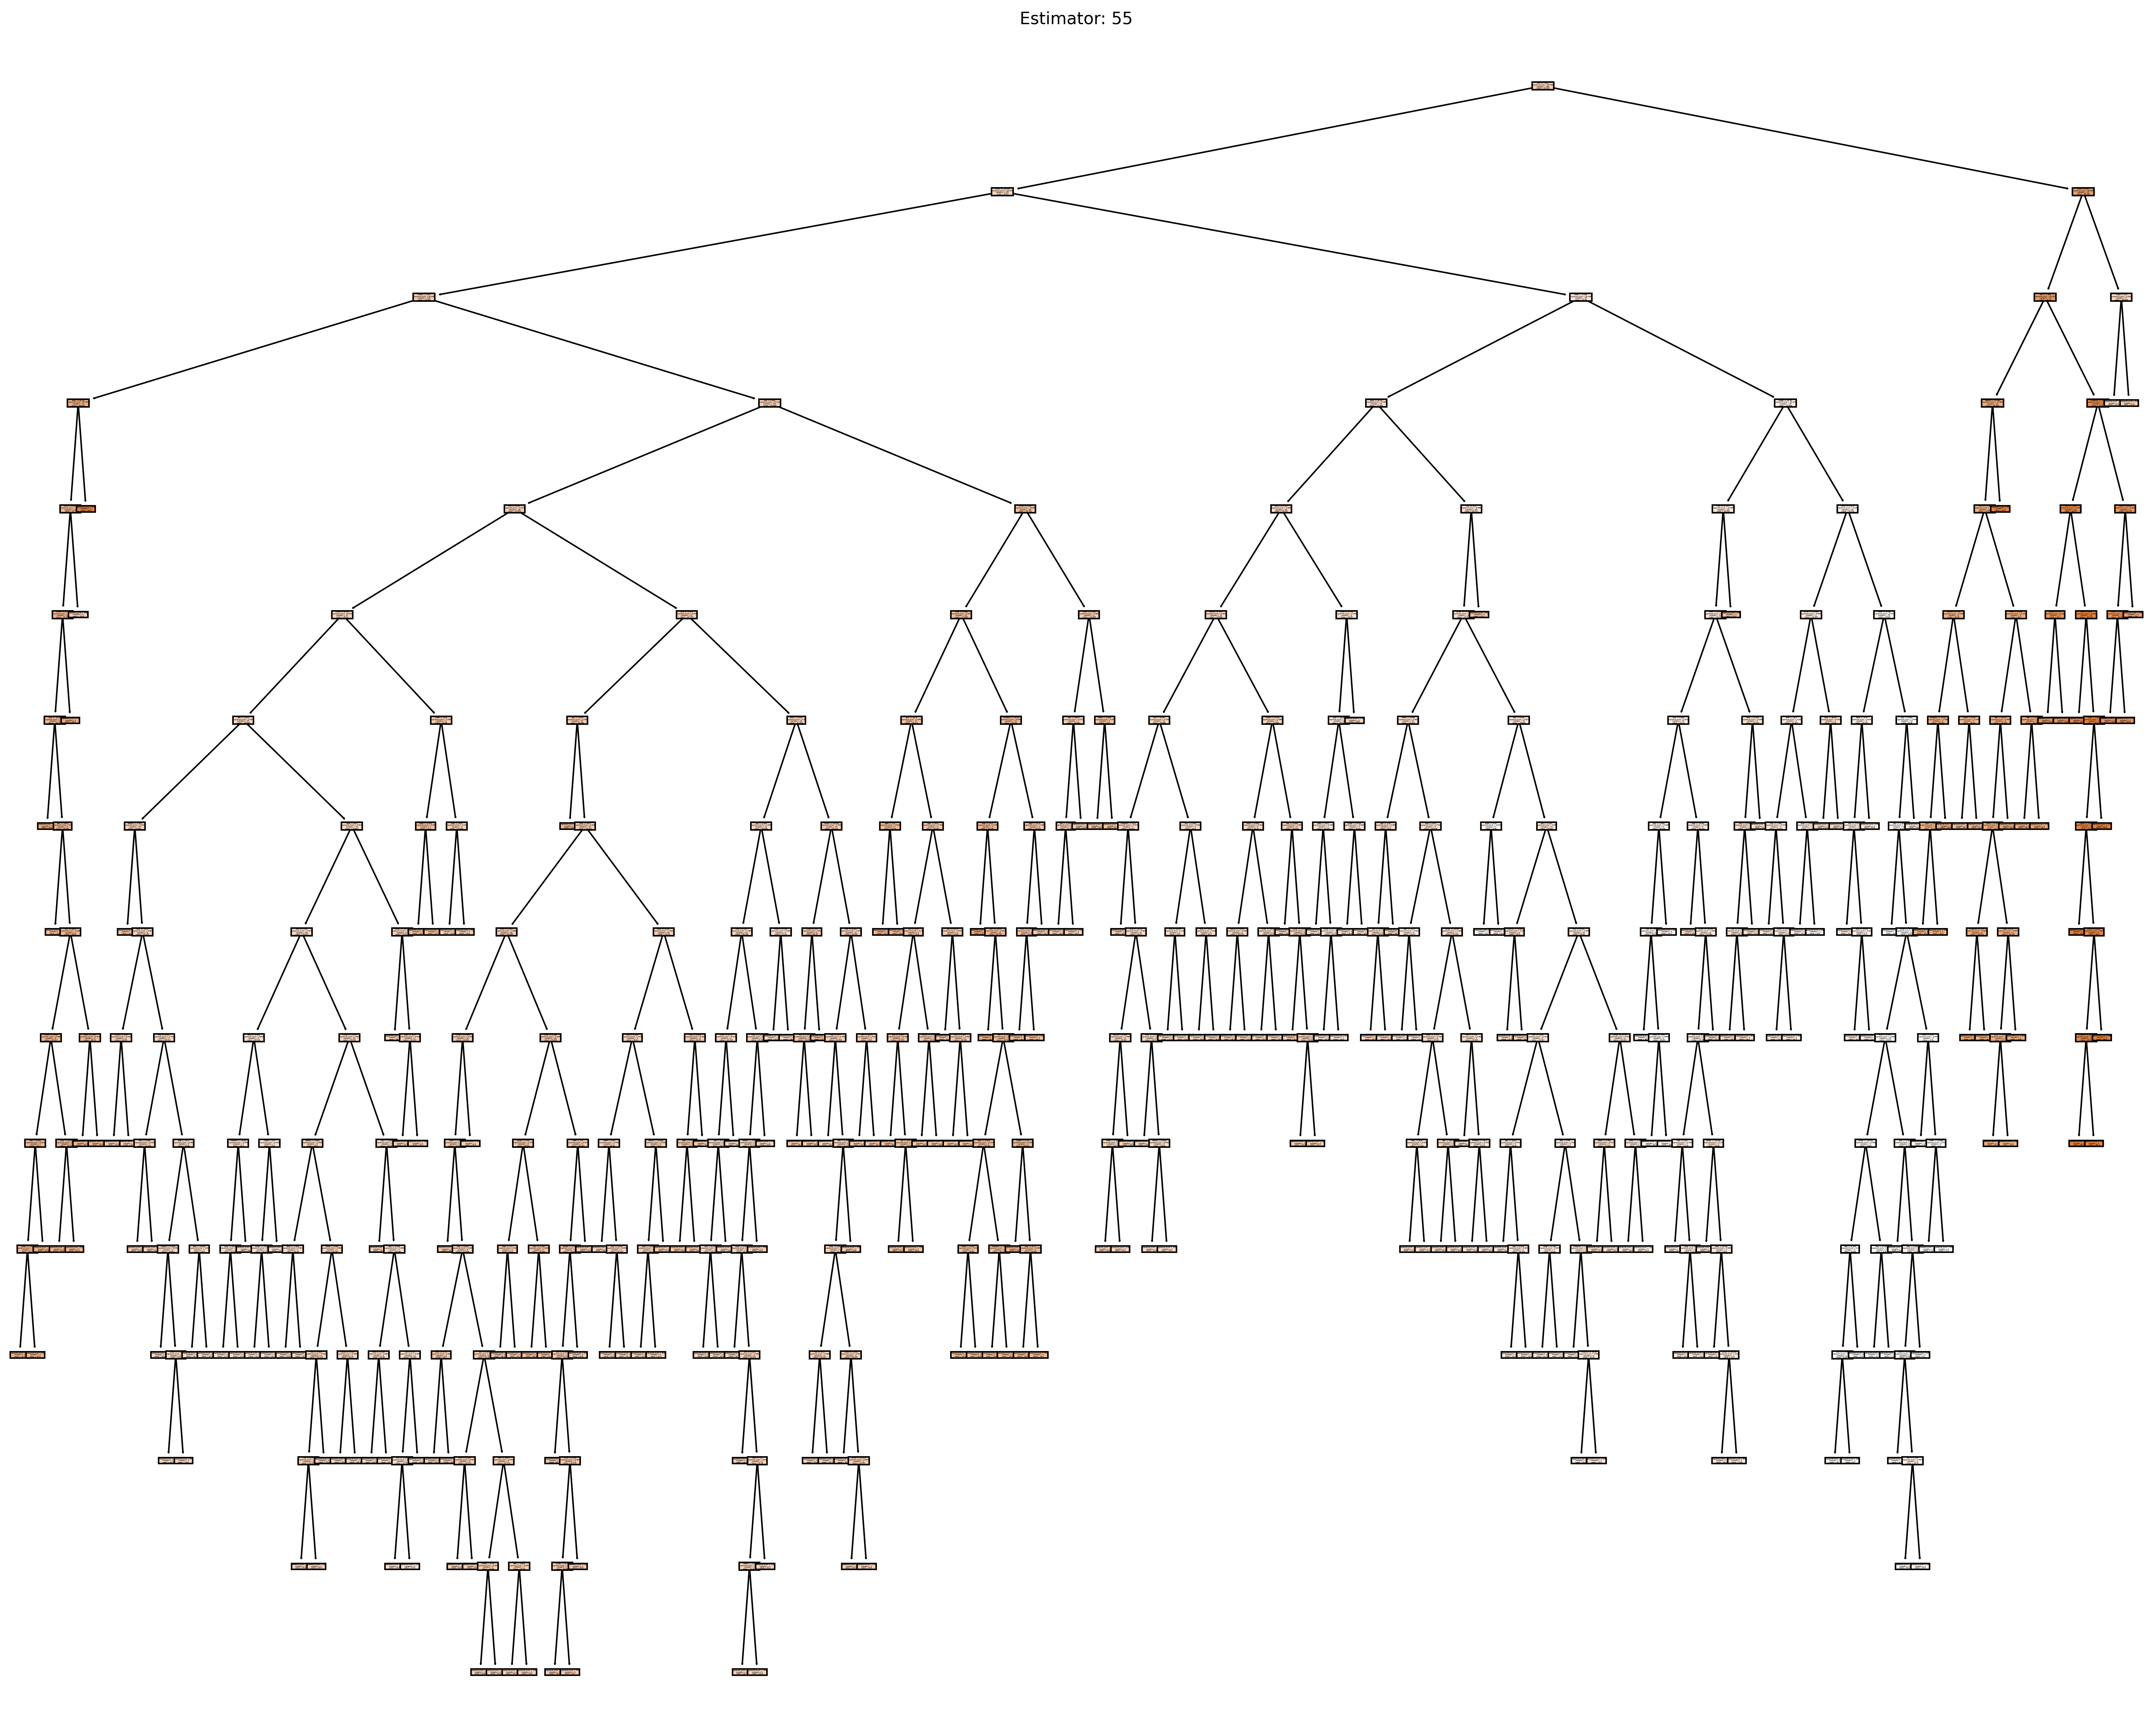

In [16]:
# Visualizar uno de los árboles
from sklearn import tree
fig = plt.figure(figsize=(25,20), dpi=300)

index = 55  # El indicdor del árbol de decisión
tree.plot_tree(bosque.estimators_[index],
               feature_names = X_train.columns.to_list(),
               class_names=["target"],
               filled = True)
plt.title('Estimator: ' + str(index), fontsize = 11)
plt.show()

In [17]:
# Consultamos la profundidad del árbol visualizado dentro del bosque
bosque.estimators_[55].get_depth()

15

In [18]:
# Consultamos la profundidad de todos los 100 árboles del bosque (usando los bucles)
bosque_profundidades = []
for arbol in bosque.estimators_:
    profundidad = arbol.get_depth()
    bosque_profundidades.append(profundidad)

bosque_profundidades

[17,
 16,
 19,
 18,
 17,
 16,
 16,
 15,
 19,
 16,
 15,
 16,
 14,
 19,
 19,
 14,
 15,
 19,
 16,
 18,
 17,
 18,
 19,
 16,
 20,
 18,
 17,
 16,
 19,
 18,
 17,
 16,
 15,
 17,
 17,
 16,
 18,
 20,
 18,
 19,
 16,
 17,
 16,
 17,
 17,
 19,
 17,
 18,
 17,
 17,
 18,
 16,
 17,
 18,
 16,
 15,
 15,
 19,
 18,
 17,
 20,
 19,
 19,
 18,
 15,
 18,
 19,
 21,
 18,
 21,
 17,
 17,
 19,
 15,
 16,
 21,
 15,
 19,
 15,
 18,
 16,
 21,
 23,
 16,
 19,
 16,
 17,
 15,
 16,
 17,
 16,
 18,
 17,
 14,
 17,
 20,
 19,
 18,
 16,
 19]

In [19]:
# Consultamos la profundidad de todos los 100 árboles del bosque (usando List Comprehension)
bosque_profundidades_LC = [arbol.get_depth() for arbol in bosque.estimators_]
bosque_profundidades_LC

[17,
 16,
 19,
 18,
 17,
 16,
 16,
 15,
 19,
 16,
 15,
 16,
 14,
 19,
 19,
 14,
 15,
 19,
 16,
 18,
 17,
 18,
 19,
 16,
 20,
 18,
 17,
 16,
 19,
 18,
 17,
 16,
 15,
 17,
 17,
 16,
 18,
 20,
 18,
 19,
 16,
 17,
 16,
 17,
 17,
 19,
 17,
 18,
 17,
 17,
 18,
 16,
 17,
 18,
 16,
 15,
 15,
 19,
 18,
 17,
 20,
 19,
 19,
 18,
 15,
 18,
 19,
 21,
 18,
 21,
 17,
 17,
 19,
 15,
 16,
 21,
 15,
 19,
 15,
 18,
 16,
 21,
 23,
 16,
 19,
 16,
 17,
 15,
 16,
 17,
 16,
 18,
 17,
 14,
 17,
 20,
 19,
 18,
 16,
 19]

In [20]:
# Revisamos las estadísticas de este dato
pd.Series([arbol.get_depth() for arbol in bosque.estimators_]).describe()

count    100.000000
mean      17.350000
std        1.754504
min       14.000000
25%       16.000000
50%       17.000000
75%       19.000000
max       23.000000
dtype: float64

Procedemos a generar otro bosque **con menos profundidad** en sus árboles:

In [21]:
bosque2 = RandomForestRegressor(max_depth=4,
                                n_jobs=-1,
                                random_state=77)

In [22]:
bosque2.fit(X_train, y_train)
y_pred = bosque2.predict(X_test) 

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_pred)*100)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R^2 coefficient of determination:', r2_score(y_test, y_pred))

Mean Absolute Error: 2.341105430237288
Mean Absolute Percentage Error: 12.256685414820192
Mean Squared Error: 11.378720478576613
Root Mean Squared Error: 3.3732359061554846
R^2 coefficient of determination: 0.8727419509413352


In [23]:
# Sacar diferentes parámetros del bosque que se ha entrenado
bosque2.__getstate__()

{'estimator': DecisionTreeRegressor(),
 'n_estimators': 100,
 'estimator_params': ('criterion',
  'max_depth',
  'min_samples_split',
  'min_samples_leaf',
  'min_weight_fraction_leaf',
  'max_features',
  'max_leaf_nodes',
  'min_impurity_decrease',
  'random_state',
  'ccp_alpha'),
 'base_estimator': 'deprecated',
 'bootstrap': True,
 'oob_score': False,
 'n_jobs': -1,
 'random_state': 77,
 'verbose': 0,
 'warm_start': False,
 'class_weight': None,
 'max_samples': None,
 'criterion': 'squared_error',
 'max_depth': 4,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'LSTAT'], dtype=object),
 'n_features_in_': 12,
 'n_outputs_': 1,
 'estimator_': DecisionTreeRegressor(),
 'estimators_': [DecisionTreeRegressor(max_depth=4, max_features=1.0,

El resultado se puede considerar como un modelo aceptable. Sin embargo, es evidente que para este tipo de modelos deberíamos de buscar la mejor combinación de los **hiperparámetros**.  

Antes de empezar a investigar los hiperparámetros vamos a revisar una métrica de calidad del modelo llamado ***out-of-bag* (OOB)** que hace referencia a una medida de error o precisión que se puede calcular para un modelo de *Random Forest* en el proceso de entrenamineto. 


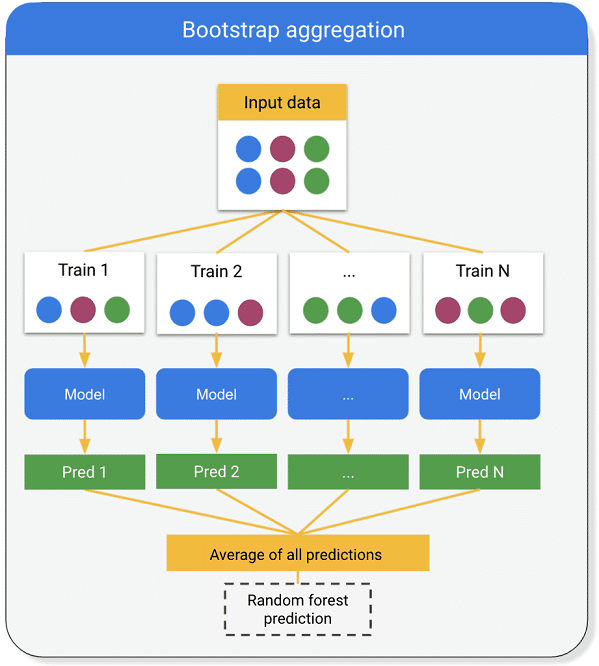

El proceso de ***Bagging*** que proviene de los términos de ***Bootstrap Aggregation*** se basa en ajustar los modelos de base (árboles de decisión en caso de *Random Forest*) empleando **subconjuntos de muestras extraídas aleatoriamente por *bootstrapping* que permiten la repetición de datos**. Cada árbol se puede estimar que solo contenga aproximadamente dos tercios (0.632) de las observaciones originales. Al tercio restante se le llama **out-of-bag (*OOB*)**.

Para cada observación podemos hacer un promedio de la respuestas de aquellos árboles en los que esa observación haya sido excluida o que no se haya llegado a usar en el proceso de entrenamiento. De esta manera se pueden conseguir las predicciones para las ***n*** observaciones y posteriormente calcular la métrica de error o de precisión (como $R^2$ o *MSE* de **OOB-error**). 

El ***OOB-error*** se puede calcular al mismo tiempo que se genera el bosque aleatorio, por lo tanto, sirve como estimación del error de test o como la de **validación cruzada** (*Cross-Validation*), ya que **para cada observación se estima la respuesta utilizando únicamente los árboles en cuyo entrenamiento no participó dicha observación**.

Ahora analizamos mediante la curva de complejidad, el **tamaño del bosque** o mejor dicho la cantidad de los árboles que le forman: ***n_estimators*** 

In [24]:
np.arange(10,301,10)

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300])

/Users/pablo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


El mejor valor de n_estimator podría ser = 50  que consigue un R2 = 0.8977786239875669


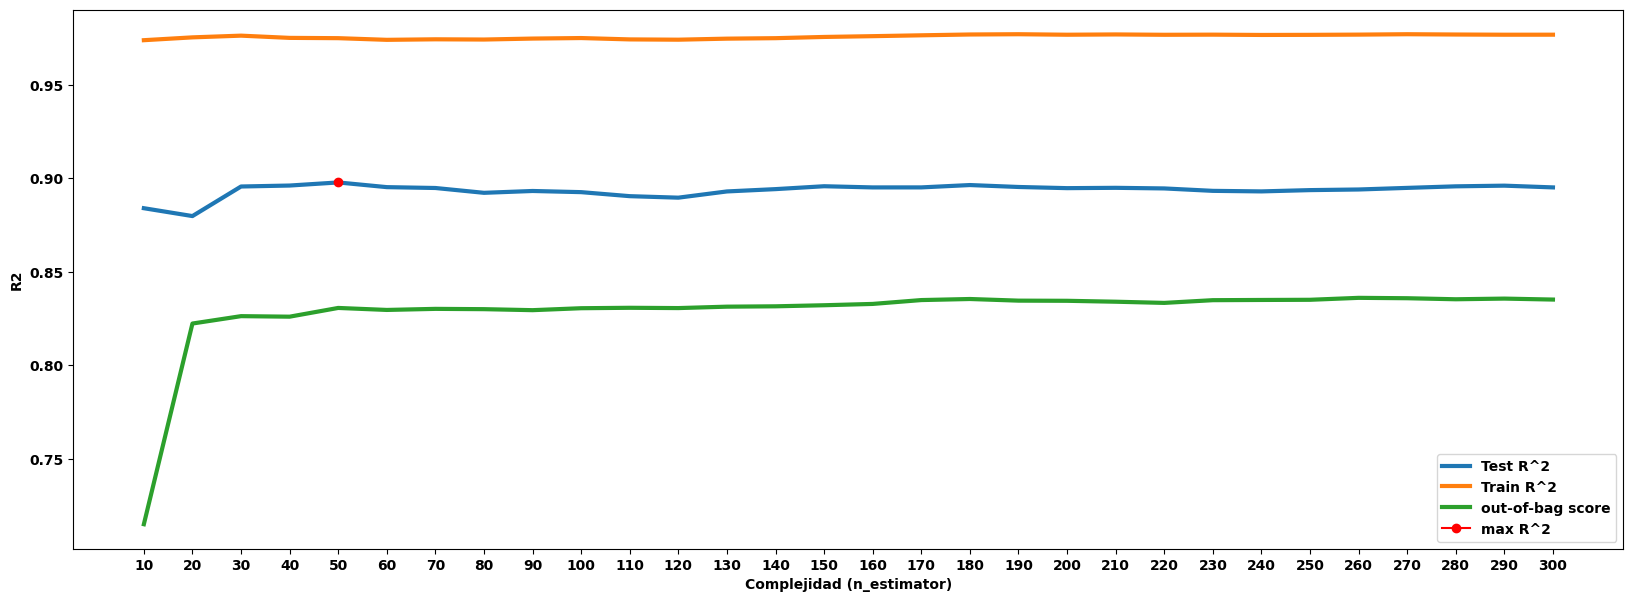

In [25]:
# Consideramos un rango para asignar el hiperparámetro 
hiper_param = np.arange(10,301,10)
    
# Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento
train_r2 = np.zeros(hiper_param.size) 
test_r2 = np.zeros(hiper_param.size)
oob_score = np.zeros(hiper_param.size)

for i in range(hiper_param.size):
    # Generamos un modelo para cada hiperparámetro, lo entrenamos y calculamos el R_cuadrado sobre datos de train y de test 
    mod_bosque = RandomForestRegressor(n_estimators=hiper_param[i],
                                       n_jobs=-1,
                                       oob_score=True,
                                       random_state=77)
    mod_bosque.fit(X_train, y_train)
    train_r2[i] = r2_score(y_train, mod_bosque.predict(X_train)) 
    test_r2[i] = r2_score(y_test, mod_bosque.predict(X_test))    
    oob_score[i] = mod_bosque.oob_score_   

print("El mejor valor de n_estimator podría ser =", hiper_param[np.argmax(test_r2)],
      " que consigue un R2 =", max(test_r2))

# Graficamos el R_cuadrado de training versus de test
fig = plt.figure(figsize=(20,7))
plt.plot(hiper_param, test_r2, linewidth=3, label='Test R^2')
plt.plot(hiper_param, train_r2, linewidth=3, label='Train R^2')
plt.plot(hiper_param, oob_score, linewidth=3, label='out-of-bag score')
plt.plot(hiper_param[np.argmax(test_r2)], max(test_r2),
        marker='o', color = "red", label="max R^2")
plt.xticks(hiper_param)
plt.xlabel('Complejidad (n_estimator)')
plt.ylabel('R2')
plt.legend(loc = 'lower right')
plt.show()



Los modelos de Random Forest **no suelen tener mucha dependencia al número de los árboles** a partir de un determinado tamaño. Vemos que en este caso el rendimiento aceptable incluso se consigue con la mitad de los árboles incluidos por defecto que son 100.

In [26]:
from sklearn.ensemble import RandomForestRegressor

bosque = RandomForestRegressor(n_estimators=50,
                               n_jobs=-1,
                               oob_score=True,
                               random_state = 77)
bosque.fit(X_train, y_train)
y_pred = bosque.predict(X_test) 

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_pred)*100)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R^2 coefficient of determination:', r2_score(y_test, y_pred))
print('R^2 of OOB:', bosque.oob_score_)

Mean Absolute Error: 2.0316666666666667
Mean Absolute Percentage Error: 10.404213697214928
Mean Squared Error: 9.140077764705882
Root Mean Squared Error: 3.0232561526780826
R^2 coefficient of determination: 0.8977786239875669
R^2 of OOB: 0.8307056573673339


In [27]:
# Consultamos las profundidades de los árboles del bosque
pd.Series([arbol.get_depth() for arbol in bosque.estimators_]).describe()

count    50.000000
mean     17.120000
std       1.479658
min      14.000000
25%      16.000000
50%      17.000000
75%      18.000000
max      20.000000
dtype: float64

Teniendo una idea sobre el número de los árboles podemos echar un vistazo a la profundidad de los árboles: ***max_depth***

El mejor valor de max_depth podría ser = 9  que consigue un R2 = 0.9022628198010892


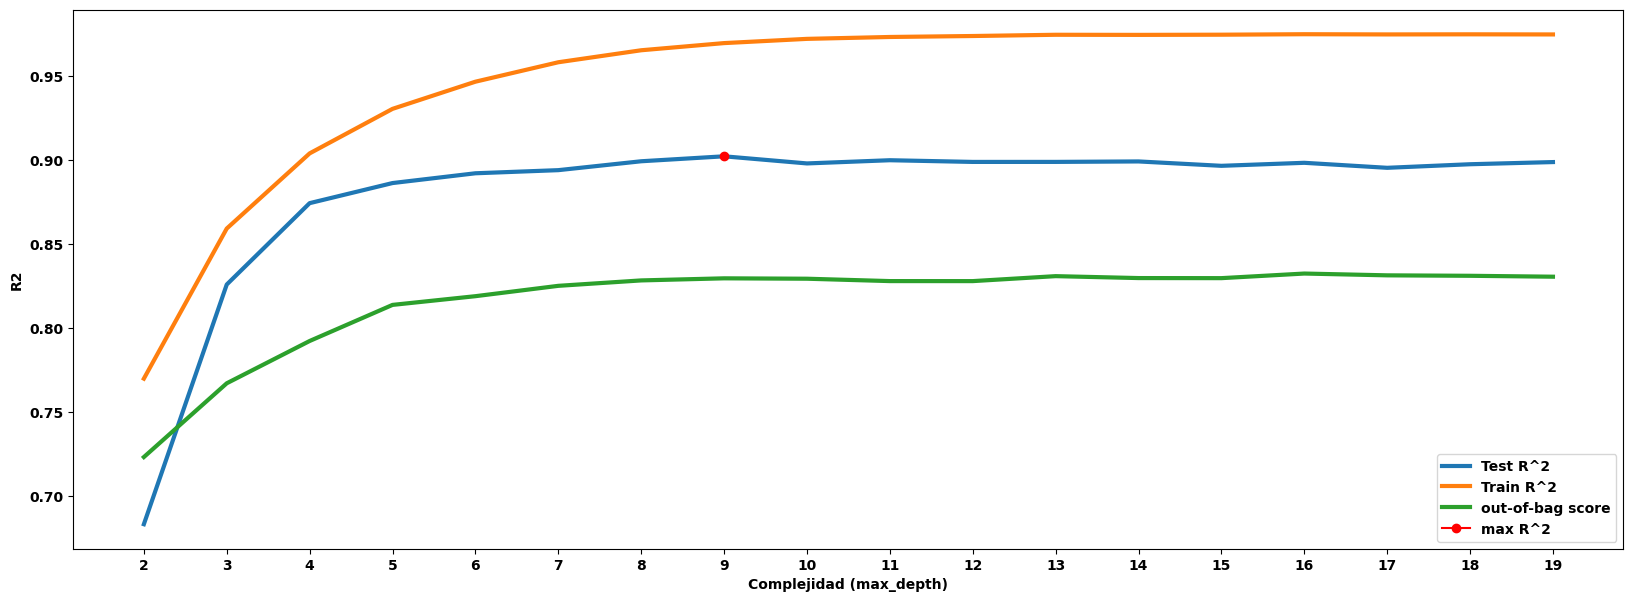

In [28]:
# Consideramos un rango para asignar el hiperparámetro 
hiper_param = np.arange(2,20)
    
# Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento
train_r2 = np.zeros(hiper_param.size) 
test_r2 = np.zeros(hiper_param.size)
oob_score = np.zeros(hiper_param.size) 

for i in range(hiper_param.size):
    # Generamos un modelo para cada hiperparámetro, lo entrenamos y calculamos el R_cuadrado sobre datos de train y de test 
    mod_bosque = RandomForestRegressor(max_depth=hiper_param[i],
                                       n_estimators=50,
                                       n_jobs=-1,
                                       oob_score=True,
                                       random_state=77)
    mod_bosque.fit(X_train, y_train)
    train_r2[i] = r2_score(y_train, mod_bosque.predict(X_train)) 
    test_r2[i] = r2_score(y_test, mod_bosque.predict(X_test))    
    oob_score[i] = mod_bosque.oob_score_   

print("El mejor valor de max_depth podría ser =", hiper_param[np.argmax(test_r2)],
      " que consigue un R2 =", max(test_r2))

# Graficamos el R_cuadrado de training versus de test
fig = plt.figure(figsize=(20,7))
plt.plot(hiper_param, test_r2, linewidth=3, label='Test R^2')
plt.plot(hiper_param, train_r2, linewidth=3, label='Train R^2')
plt.plot(hiper_param, oob_score, linewidth=3, label='out-of-bag score')
plt.plot(hiper_param[np.argmax(test_r2)], max(test_r2),
        marker='o', color = "red", label="max R^2")
plt.xticks(hiper_param)
plt.xlabel('Complejidad (max_depth)')
plt.ylabel('R2')
plt.legend(loc = 'lower right')
plt.show()



Construimos un modelo con la profundidad elegida a raíz del análisis de complejidad en el gráfico anterior.

In [29]:
from sklearn.ensemble import RandomForestRegressor

bosque = RandomForestRegressor(n_estimators=50,
                               max_depth=9,
                               n_jobs=-1,
                               oob_score=True,
                               random_state = 77)
bosque.fit(X_train, y_train)
y_pred = bosque.predict(X_test) 

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_pred)*100)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R^2 coefficient of determination:', r2_score(y_test, y_pred))
print('R^2 of OOB:', bosque.oob_score_)

Mean Absolute Error: 1.9966561404625456
Mean Absolute Percentage Error: 10.195430199781432
Mean Squared Error: 8.739125439012497
Root Mean Squared Error: 2.956201183785112
R^2 coefficient of determination: 0.9022628198010894
R^2 of OOB: 0.8295570465369146


In [30]:
# Consultamos las profundidades
pd.Series([arbol.get_depth() for arbol in bosque.estimators_]).describe()

count    50.0
mean      9.0
std       0.0
min       9.0
25%       9.0
50%       9.0
75%       9.0
max       9.0
dtype: float64

Uno de los hiperparámetros más importantes y más críticos sería el ***max_features***, que es el número de predictores considerados en cada bifurcación de los árboles y **determina cuánto se decorrelacionan los árboles entre sí**.  
Cuanto menor sea el valor de *max_features*, más aleatoriedad se introduce en el proceso, lo que puede **ayudar a reducir el sobreajuste (_overfitting_)** y mejorar la generalización del modelo. Sin embargo, si se establece en un valor muy bajo, podría **reducir la capacidad predictiva** del modelo. Por lo tanto, elegir el valor adecuado para *max_features* es un equilibrio entre reducir el sobreajuste y mantener el rendimiento del modelo.

El mejor valor de max_features podría ser = 7  que consigue un R2 = 0.8514669835844813


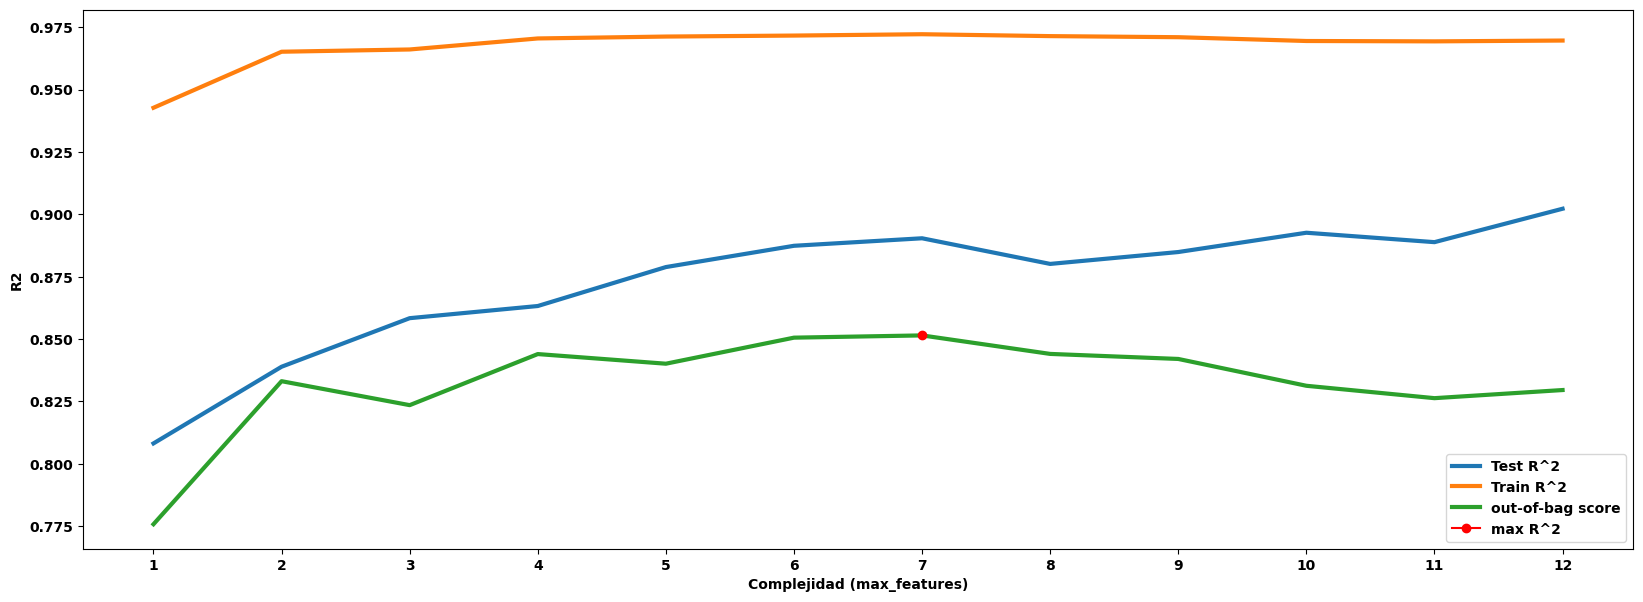

In [31]:
# Consideramos un rango para asignar el hiperparámetro 
hiper_param = np.arange(1, X_train.shape[1] + 1, 1)
    
# Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento
train_r2 = np.zeros(hiper_param.size) 
test_r2 = np.zeros(hiper_param.size) 
oob_score = np.zeros(hiper_param.size)

for i in range(hiper_param.size):
    # Generamos un modelo para cada hiperparámetro, lo entrenamos y calculamos el R_cuadrado sobre datos de train y de test 
    mod_bosque = RandomForestRegressor(max_features=hiper_param[i],
                                       max_depth=9,
                                       n_estimators=50,
                                       n_jobs=-1,
                                       random_state=77,
                                       oob_score=True)
    mod_bosque.fit(X_train, y_train)
    train_r2[i] = r2_score(y_train, mod_bosque.predict(X_train)) 
    test_r2[i] = r2_score(y_test, mod_bosque.predict(X_test))
    oob_score[i] = mod_bosque.oob_score_   

print("El mejor valor de max_features podría ser =", hiper_param[np.argmax(oob_score)],
      " que consigue un R2 =", max(oob_score))

# Graficamos el R_cuadrado de training versus de test
fig = plt.figure(figsize=(20,7))
plt.plot(hiper_param, test_r2, linewidth=3, label='Test R^2')
plt.plot(hiper_param, train_r2, linewidth=3, label='Train R^2')
plt.plot(hiper_param, oob_score, linewidth=3, label='out-of-bag score')
plt.plot(hiper_param[np.argmax(oob_score)], max(oob_score),
        marker='o', color = "red", label="max R^2")
plt.xticks(hiper_param)
plt.xlabel('Complejidad (max_features)')
plt.ylabel('R2')
plt.legend(loc = 'lower right')
plt.show()



Evaluamos el modelo que nos indican los análisis de complejidad del modelo.

In [32]:
from sklearn.ensemble import RandomForestRegressor

bosque = RandomForestRegressor(max_features=6,
                               max_depth=9,
                               n_estimators=50,
                               n_jobs=-1,
                               oob_score=True,
                               random_state=77)
bosque.fit(X_train, y_train)
y_pred = bosque.predict(X_test) 

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_pred)*100)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R^2 coefficient of determination:', r2_score(y_test, y_pred))
print('R^2 of OOB:', bosque.oob_score_)

Mean Absolute Error: 2.0906921690458513
Mean Absolute Percentage Error: 10.36940598140028
Mean Squared Error: 10.067572861021867
Root Mean Squared Error: 3.1729438792739257
R^2 coefficient of determination: 0.8874056460511746
R^2 of OOB: 0.8505652049471825


Para asegurarnos y tener una visión del grado de posible sobreajuste u *Overfitting* que puede tener el modelo, podemos analizar su rendimiento frente al tamaño de los datos utilizados en entrenamiento (**Learning Curve**). 

In [33]:
# Definimos una función que toma el valor de los hiperparámetros y 
# dibuja la evolución del rendimiento del modelo para el conjunto de training y de test: 
def curva_aprendizaje_rf(n_arboles: int,
                         profundidad: int,
                         n_var: int):
    """Función para sacar la gráfica de Learning Curve a partir de los hiperparámetros del bosque"""

    # Generar la estructura del modelo
    modelo_bosque = RandomForestRegressor(n_estimators=int(n_arboles),
                                          max_depth=int(profundidad),
                                          max_features=int(n_var),
                                          oob_score=True,
                                          n_jobs=-1,
                                          random_state=77)
    
    # Crear un listado de los tamaños de subconjuntos de datos de entrenamiento
    num_samples = np.linspace(20,X_train.shape[0]).astype(int)

    # Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento de los modelos
    train_R2 = np.zeros(num_samples.size) 
    test_R2 = np.zeros(num_samples.size)
    oob_score = np.zeros(num_samples.size)

    for i in range(num_samples.size):
        # Generamos un modelo para cada subconjunto de datos de entrenamiento y lo ajustamos  
        modelo_bosque.fit(X_train[:num_samples[i]], y_train[:num_samples[i]])

        # Calculamos el R_cuadrado sobre datos de train y de test
        train_R2[i] = r2_score(y_train[:num_samples[i]], modelo_bosque.predict(X_train[:num_samples[i]])) 
        test_R2[i] = r2_score(y_test, modelo_bosque.predict(X_test))
        oob_score[i] = modelo_bosque.oob_score_

    print("La diferencia de R^2 entre training y OOB es= ", train_R2[-1]-oob_score[-1])

    # Graficamos el R_cuadrado de training versus de test
    fig = plt.figure(figsize=(20,7))
    plt.plot(num_samples, test_R2, label = 'Test R^2')
    plt.plot(num_samples, train_R2, label = 'Train R^2')
    plt.plot(num_samples, oob_score, label = 'OOB R^2')
    plt.title('Curva de aprendizaje (Learning Curve) para max_features = %s' % n_var)
    plt.xlabel('Tamaño de entrenamiento (Training size)')
    plt.ylabel('R2')
    plt.legend(loc = 'lower right')
    plt.show()    


Sacamos la grafica de aprendizaje para el último modelo construido en base a los análisis de los hiperparámetros.

La diferencia de R^2 entre training y OOB es=  0.12114271757378603


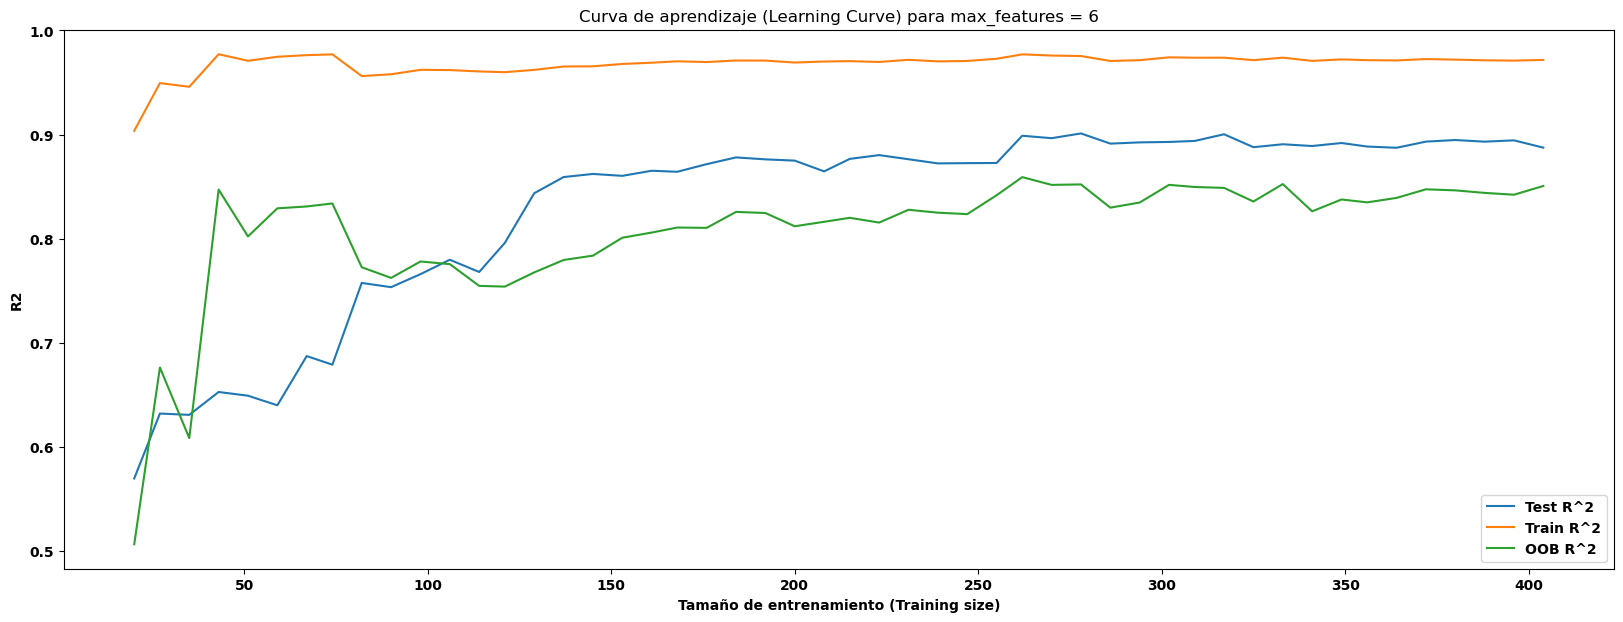

In [34]:
curva_aprendizaje_rf(n_arboles=50,
                     profundidad=9,
                     n_var=6)

La diferencia de R^2 entre training y OOB es=  0.14133615157243162


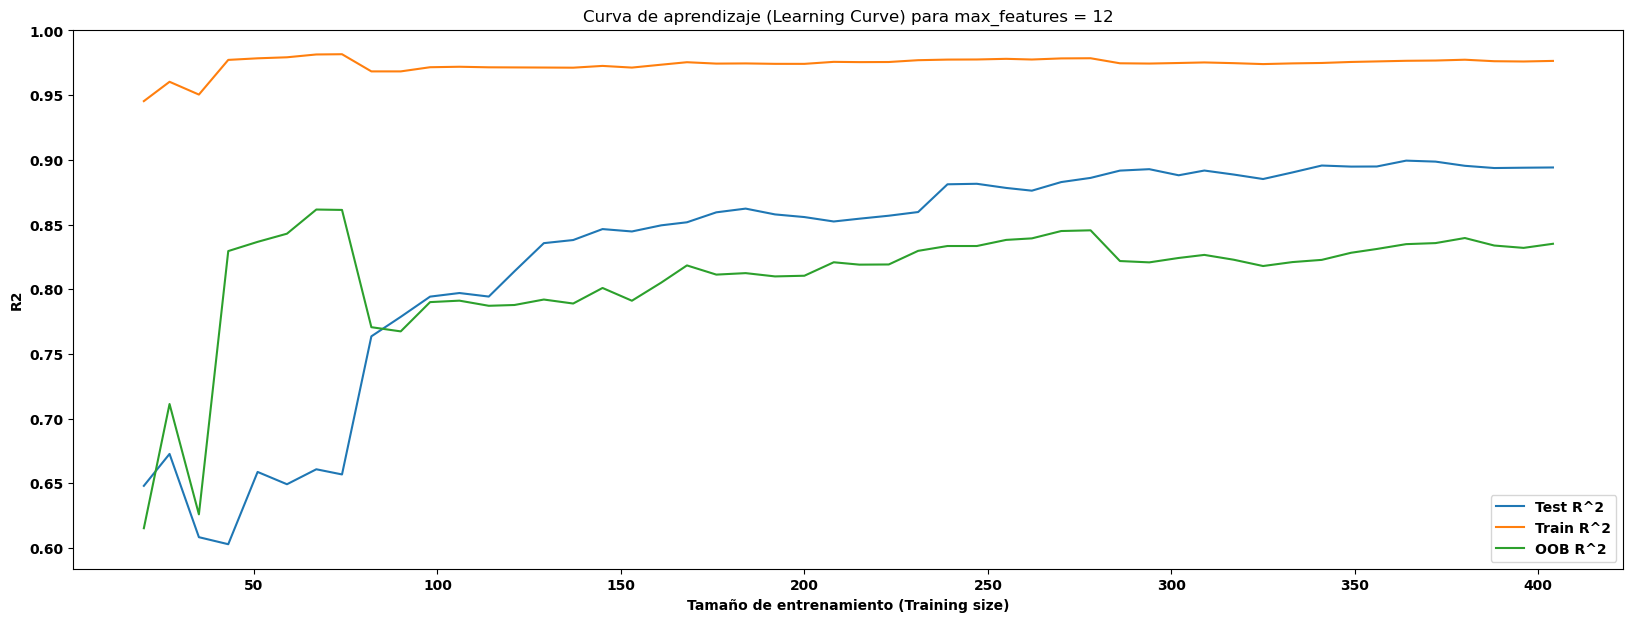

In [35]:
curva_aprendizaje_rf(n_arboles=400,
                     profundidad=30,
                     n_var=12)

---

### **`Ejercicio 9.1`**

- **`9.1.1`** Realiza una búsqueda del modelo óptimo según estos rangos indicados (**mediante las funciones de *numpy***) usando la técnica de *Grid Search* de *`5-fold-CV`* e imprime esos valores.
  -     parametros={'max_depth': [5, 6, 7, 8, 9, 10],
                    'max_features': [6, 7, 8, 9, 10, 11, 12],
                    'n_estimators': [20, 30, 40, 50, 60, 70, 80, 90, 100]}  
  - para _KFold_: `random_state=111`                        
  - para _modelo_: `random_state=77`
  - `scoring='r2'`    

- **`9.1.2`** Visualiza los resultados del mejor modelo conseguido con la gráfica de *"Valores reales vs. predichos"* para el conjunto de test.
- **`9.1.3`** Calcula diferentes métricas para evaluar tu modelo y **analiza** su rendimiendo en comparación con modelos anteriores.
    - MAE
    - MAPE
    - MSE
    - RMSE
    - $R^2$    
      
- **`9.1.4`** Saca la gráfica del *Learning Curve* para el modelo óptimo, usando la función definida en la sesión y **explica** si este modelo tiene preferencia o no, para ser elegido en práctica como predictor de precios de viviendas comparando con el modelo inicial. Si tienes otra recomendación indica el modelo que en crees que sería la mejor opción explicando tu opinión al respecto.   

In [36]:
## Solución
# Ejercicio 9.1.1
'''- **`9.1.1`** Realiza una búsqueda del modelo óptimo según estos rangos indicados (**mediante las funciones de *numpy***) usando la técnica de *Grid Search* de *`5-fold-CV`* e imprime esos valores.
  -     parametros={'max_depth': [5, 6, 7, 8, 9, 10],
                    'max_features': [6, 7, 8, 9, 10, 11, 12],
                    'n_estimators': [20, 30, 40, 50, 60, 70, 80, 90, 100]}  
  - para _KFold_: `random_state=111`                        
  - para _modelo_: `random_state=77`
  - `scoring='r2'` '''
from random import Random
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV, KFold

#trozeamos
folds = KFold(n_splits=5, shuffle=True, random_state=111)

#definimos modelo, parametros y la funcion de scoring
modelo = RandomForestRegressor(random_state=77)
parametros = {'max_depth': np.arange(5,11,1),
              'max_features': np.arange(6,13,1),
              'n_estimators': np.arange(20,101,10)}
score = make_scorer(r2_score)

#Definir modelo
modelo_grid_9_1 = GridSearchCV(estimator=modelo,
                               param_grid=parametros,
                               scoring=score,
                               cv=folds,
                               n_jobs=-1)
modelo_grid_9_1.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=True),
             estimator=RandomForestRegressor(random_state=77), n_jobs=-1,
             param_grid={'max_depth': array([ 5,  6,  7,  8,  9, 10]),
                         'max_features': array([ 6,  7,  8,  9, 10, 11, 12]),
                         'n_estimators': array([ 20,  30,  40,  50,  60,  70,  80,  90, 100])},
             scoring=make_scorer(r2_score))

In [37]:
best_params_model_grid_9_1 = modelo_grid_9_1.best_params_
print(best_params_model_grid_9_1)

{'max_depth': 10, 'max_features': 6, 'n_estimators': 50}


#### CONCLUSIÓN
El modelo tiene como profundidad máxima 10, sus max_features es de 6 y tiene 50 arboles

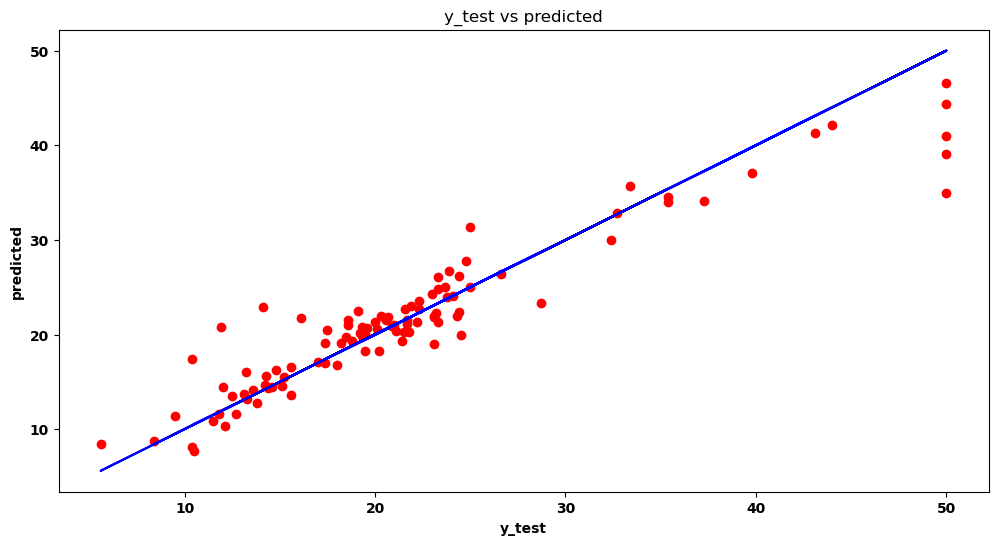

In [38]:
## Solución
# Ejercicio 9.1.2
'''- **`9.1.2`** Visualiza los resultados del mejor modelo conseguido con la gráfica de *"Valores reales vs. predichos"* para el conjunto de test.'''
predic = modelo_grid_9_1.best_estimator_.predict(X_test)
#Visualizamos las predicciones vs los reales
plt.scatter(y_test, predic, color = 'red')
plt.plot(y_test, y_test, color = 'blue')
plt.title('y_test vs predicted')
plt.xlabel('y_test')
plt.ylabel('predicted')
plt.show()

In [39]:
## Solución
# Ejercicio 9.1.3
'''- **`9.1.3`** Calcula diferentes métricas para evaluar tu modelo y **analiza** su rendimiendo en comparación con modelos anteriores.
    - MAE
    - MAPE
    - MSE
    - RMSE
    - $R^2$'''
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(y_test, predic))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, predic)*100)
print('Mean Squared Error:', mean_squared_error(y_test, predic))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predic)))
print('R^2 coefficient of determination:', r2_score(y_test, predic))

Mean Absolute Error: 2.0594742348145267
Mean Absolute Percentage Error: 10.312414260154574
Mean Squared Error: 10.157745308910853
Root Mean Squared Error: 3.1871217907244858
R^2 coefficient of determination: 0.8863971697625794


#### CONCLUSIÓN
Según el R^2 podemos observar que es el modelo que mejores números tiene pero aún, yo creo, que se podría mejor su resultado un poco más.

La diferencia de R^2 entre training y OOB es=  0.11787263609046139


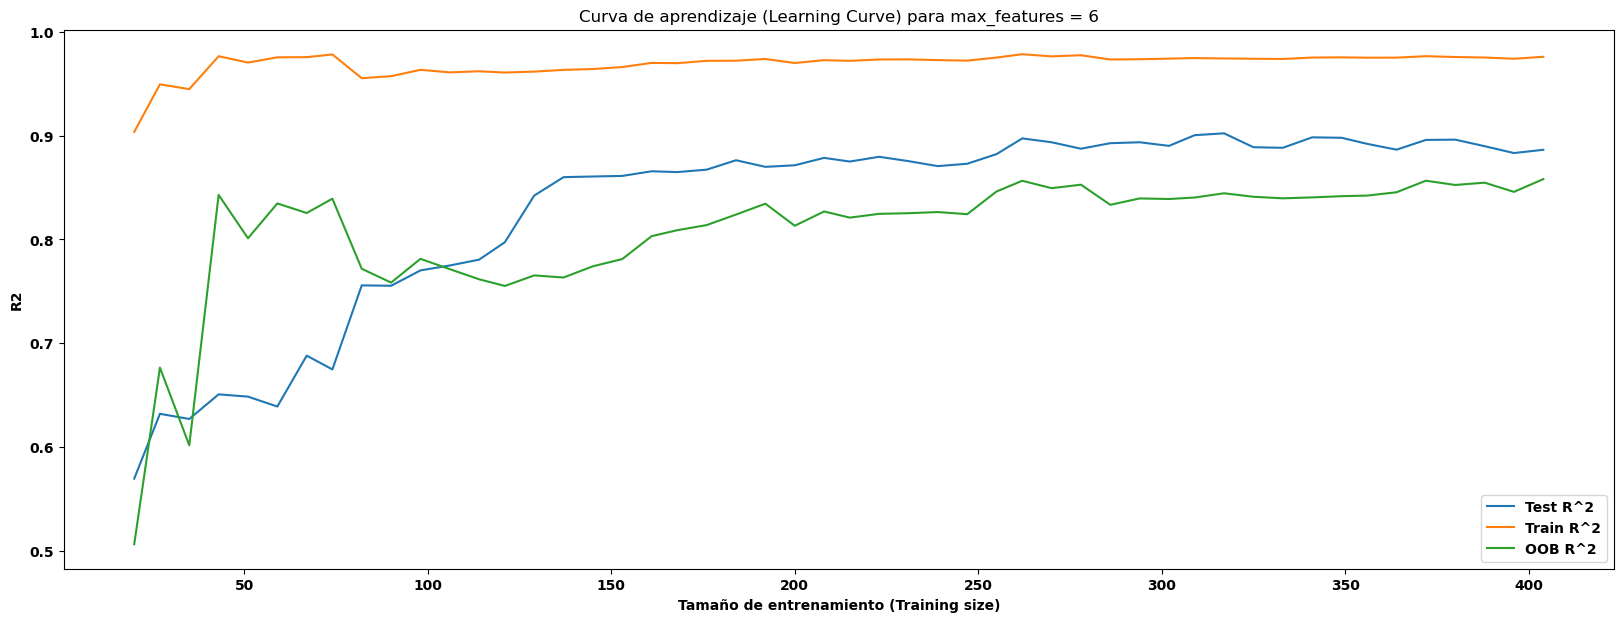

In [40]:
## Solución
# Ejercicio 9.1.4
'''- **`9.1.4`** Saca la gráfica del *Learning Curve* para el modelo óptimo, usando la función definida en la sesión y **explica** si este modelo tiene preferencia o no, para ser elegido en práctica como predictor de precios de viviendas comparando con el modelo inicial. Si tienes otra recomendación indica el modelo que en crees que sería la mejor opción explicando tu opinión al respecto.'''
curva_aprendizaje_rf(n_arboles=best_params_model_grid_9_1['n_estimators'],
                     profundidad=best_params_model_grid_9_1['max_depth'],
                     n_var=best_params_model_grid_9_1['max_features'])

#### Conclusión
Este modelo sería un buen modelo entre los anteriores, ya que podemos ver que su curva de aprendizaje, no cae como en modelos anteriores sino que se suele tener una tendencia a aumentar su valor.

---

### Dataset de **Advertising**

Este dataset consiste en un conjunto de datos sobre el gasto publicitario de diversos productos en campañas de marketing realizados por diferentes medios:  
 - **TV**: gastos en las cadenas de televisión.
 - **Radio**: gastos en las emisoras de la radio.
 - **Newspaper**: gastos en los periódicos.

La variable **Sales** contiene las ventas conseguidas según el gasto invertido en la publicidad por diferentes plataformas.  



 Vamos a realizar un estudio por si somos capeces de predecir esta variable en función de los gastos publicitarios. Primero procedemos a la carga de los datos:

In [41]:
df_adv = pd.read_csv("Advertising.csv")
df_adv

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [42]:
# Sacamos la información interesante relacionado con el datast
df_adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      199 non-null    float64
 2   Newspaper  198 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Como se pueden ver existen varias columnas con valores nulos (*missing values*) que los debemos de quitar del DataFrame.

In [43]:
# Consultar si hay valores perdidos
df_adv.isna().sum()

TV           0
Radio        1
Newspaper    2
Sales        0
dtype: int64

In [44]:
# Identificar los registros con valores perdidos
df_adv.drop(df_adv.dropna().index)

,TV,Radio,Newspaper,Sales
10,66.1,NaN,24.2,8.6
16,67.8,36.6,NaN,12.5
21,237.4,5.1,NaN,12.5


In [45]:
# Otra manera para identificar los registros con valores perdidos
df_adv[df_adv.isna().any(axis=1)]

,TV,Radio,Newspaper,Sales
10,66.1,NaN,24.2,8.6
16,67.8,36.6,NaN,12.5
21,237.4,5.1,NaN,12.5


In [46]:
# Quitar los registros que contienen algún valor nulo y reestablecer los índices
df_adv = df_adv.dropna()
df_adv = df_adv.reset_index(drop=True)

In [47]:
# Consultar las estadísticas de los datos de la tabla
df_adv.describe()

,TV,Radio,Newspaper,Sales
count,197.000000,197.000000,197.000000,197.000000
mean,147.396954,23.377157,30.198477,14.065482
std,85.886694,14.820323,21.105794,5.240514
min,0.700000,0.000000,0.300000,1.600000
25%,75.100000,10.100000,12.600000,10.400000
50%,149.800000,23.300000,25.900000,12.900000
75%,218.500000,36.500000,45.100000,17.400000
max,296.400000,49.600000,100.900000,27.000000


In [48]:
# Definir las variables de entrada y la variable objetivo
X = df_adv.drop('Sales', axis='columns')
y = df_adv['Sales']

In [49]:
# Consultar los predictores del modelo a desarrollar
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
192,38.2,3.7,13.8
193,94.2,4.9,8.1
194,177.0,9.3,6.4
195,283.6,42.0,66.2


In [50]:
# Consultar la variable objetivo
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
192     7.6
193     9.7
194    12.8
195    25.5
196    13.4
Name: Sales, Length: 197, dtype: float64

In [51]:
# Dividir el dataset en Training y Test set
from sklearn.model_selection import train_test_split
X_train_adv, X_test_adv, y_train_adv, y_test_adv = train_test_split(X, y, test_size=0.2, random_state=99)

In [52]:
# Generar un modelo inicial y calcular las predicciones
from sklearn.ensemble import RandomForestRegressor


bosque_adv = RandomForestRegressor(random_state=44)

bosque_adv.fit(X_train_adv, y_train_adv)

y_pred_adv = bosque_adv.predict(X_test_adv) 

In [53]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(y_test_adv, y_pred_adv))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_adv, y_pred_adv)*100)
print('Mean Squared Error:', mean_squared_error(y_test_adv, y_pred_adv))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_adv, y_pred_adv)))
print('R^2 coefficient of determination:', r2_score(y_test_adv, y_pred_adv))

Mean Absolute Error: 0.6875500000000013
Mean Absolute Percentage Error: 5.762712311949971
Mean Squared Error: 0.8924593500000032
Root Mean Squared Error: 0.9447006668781404
R^2 coefficient of determination: 0.9641222011278402


Este resultado es bastante mejor comparando con el primer árbol de decisión ajustado a este dataset.

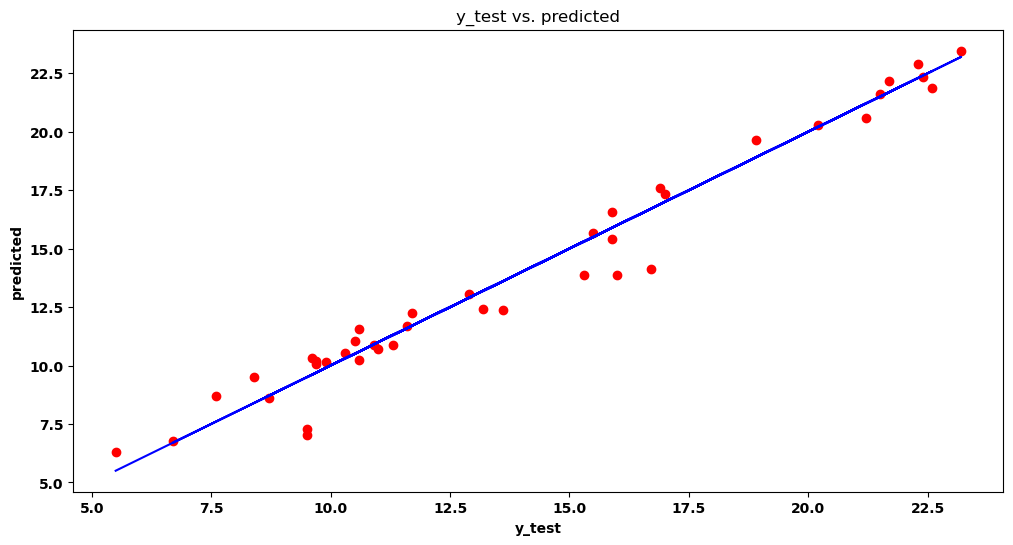

In [54]:
# visualizamos las predicciones
plt.scatter(y_test_adv, y_pred_adv, color = 'red')
plt.plot(y_test_adv, y_test_adv, color = 'blue')
plt.title('y_test vs. predicted')
plt.xlabel('y_test')
plt.ylabel('predicted')
plt.show()

---

### **`Ejercicio 9.2`**

**`9.2.1`** Saca la gráfica de *Model Complexity Curve* que dibuja la evolución de R_cuadrado de training, test y _OOB_ para el rango de tamaño del bosque entre `20` y `300` **inclusive** con pasos de `10` (poniendo `random_state=77`).

**`9.2.2`** Saca la gráfica de *Model Complexity Curve* que dibuja la evolución de R_cuadrado de training, test y _OOB_ para el rango de profundidades de los árboles del bosque entre `2` y `20` **inclusive** considerando el número óptimo de los árboles estimado en el paso anterior (poniendo `random_state=77`). 

**`9.2.3`** Para el modelo con los hiperparámetros óptimos que se intuyen de los pasos anteriores, Calcula diferentes métricas para evaluarlo y **analiza** su rendimiendo en comparación con el modelo inicial.    
    - MAE  
    - MAPE  
    - MSE  
    - RMSE  
    - $R^2$  
    - OOB $R^2$  


---

El mejor valor de n_estimator podría ser = 80  que consigue un R2 = 0.9638494721477107


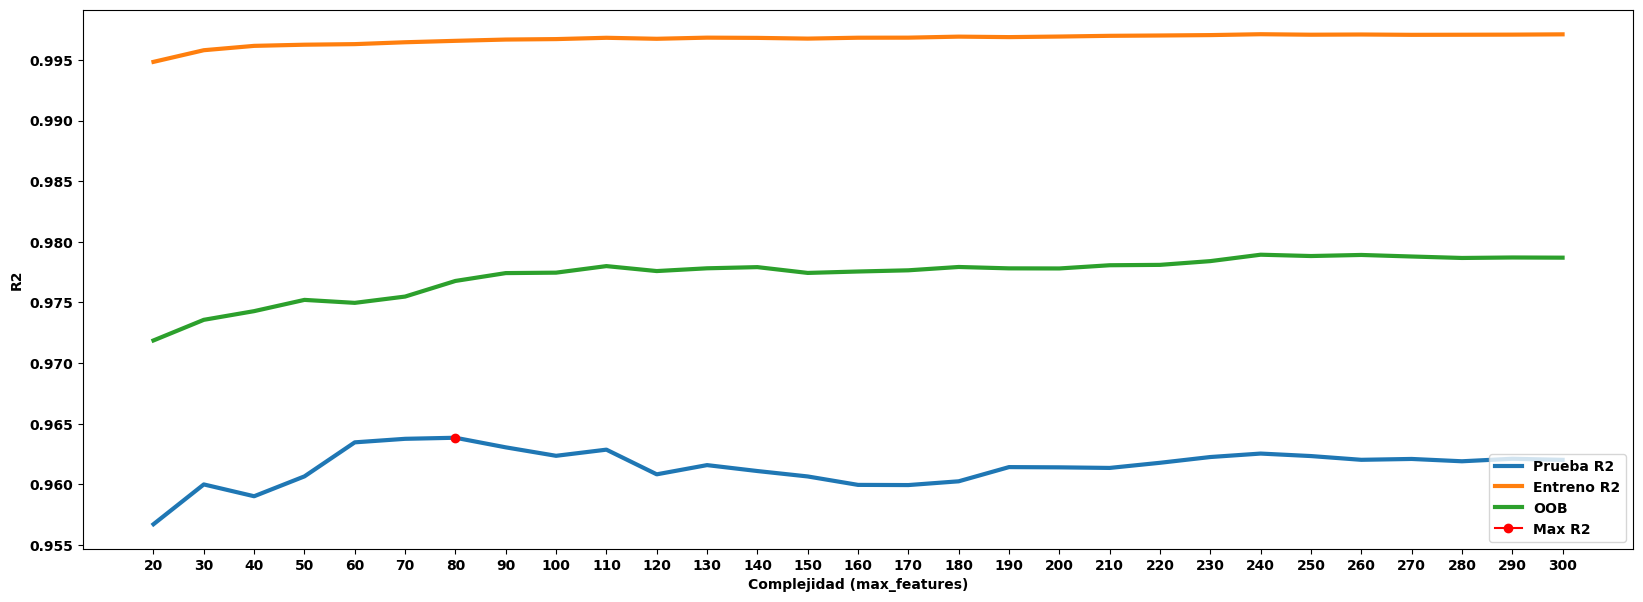

In [68]:
## Solución
# Ejercicio 9.2.1
'''**`9.2.1`** Saca la gráfica de *Model Complexity Curve* que dibuja la evolución de R_cuadrado de training, test y _OOB_ para el rango de tamaño del bosque entre `20` y `300` **inclusive** con pasos de `10` (poniendo `random_state=77`).'''

estimators = np.arange(20,301,10)

#Generamos vectores necesarios
entreno_r2 = np.zeros(estimators.size)
prueba_r2 = np.zeros(estimators.size)
oob = np.zeros(estimators.size)

#Generamos modelo por cada estimator, entrenamos y calculamos r^2
for i in range(estimators.size):
    bosque_9_2 = RandomForestRegressor(n_estimators=estimators[i], n_jobs=-1, oob_score=True,random_state=77)

    bosque_9_2.fit(X_train_adv, y_train_adv)
    entreno_r2[i] = r2_score(y_train_adv, bosque_9_2.predict(X_train_adv))
    prueba_r2[i] = r2_score(y_test_adv, bosque_9_2.predict(X_test_adv))
    oob[i] = bosque_9_2.oob_score_

print('El mejor valor de n_estimator podría ser =', estimators[np.argmax(prueba_r2)],' que consigue un R2 =', max(prueba_r2))

#Graficamos
figura = plt.figure(figsize=(20,7))
plt.plot(estimators, prueba_r2, linewidth=3, label='Prueba R2')
plt.plot(estimators, entreno_r2, linewidth=3, label='Entreno R2')
plt.plot(estimators, oob, linewidth=3, label='OOB')
plt.plot(estimators[np.argmax(prueba_r2)], max(prueba_r2), marker='o', color='red', label='Max R2')
plt.xticks(estimators)
plt.xlabel('Complejidad (max_features)')
plt.ylabel('R2')
plt.legend(loc = 'lower right')
plt.show()


In [70]:
bosque_fav = RandomForestRegressor(n_estimators=80,
                                   n_jobs=-1,
                                   oob_score=True,
                                   random_state=77)
bosque_fav.fit(X_train_adv, y_train_adv)
predi_bosque_fav = bosque_fav.predict(X_test_adv)

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(y_test_adv, predi_bosque_fav))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_adv, predi_bosque_fav)*100)
print('Mean Squared Error:', mean_squared_error(y_test_adv, predi_bosque_fav))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_adv, predi_bosque_fav)))
print('R^2 coefficient of determination:', r2_score(y_test_adv, predi_bosque_fav))
print('R^2 of OOB:', bosque_fav.oob_score_)

Mean Absolute Error: 0.7115937499999999
Mean Absolute Percentage Error: 5.701049823763902
Mean Squared Error: 0.8992434765624999
Root Mean Squared Error: 0.9482844913645376
R^2 coefficient of determination: 0.9638494721477107
R^2 of OOB: 0.9767769092275013


El mejor valor de max_depth podría ser = 100  que consigue un R2 = 0.9639749462804303


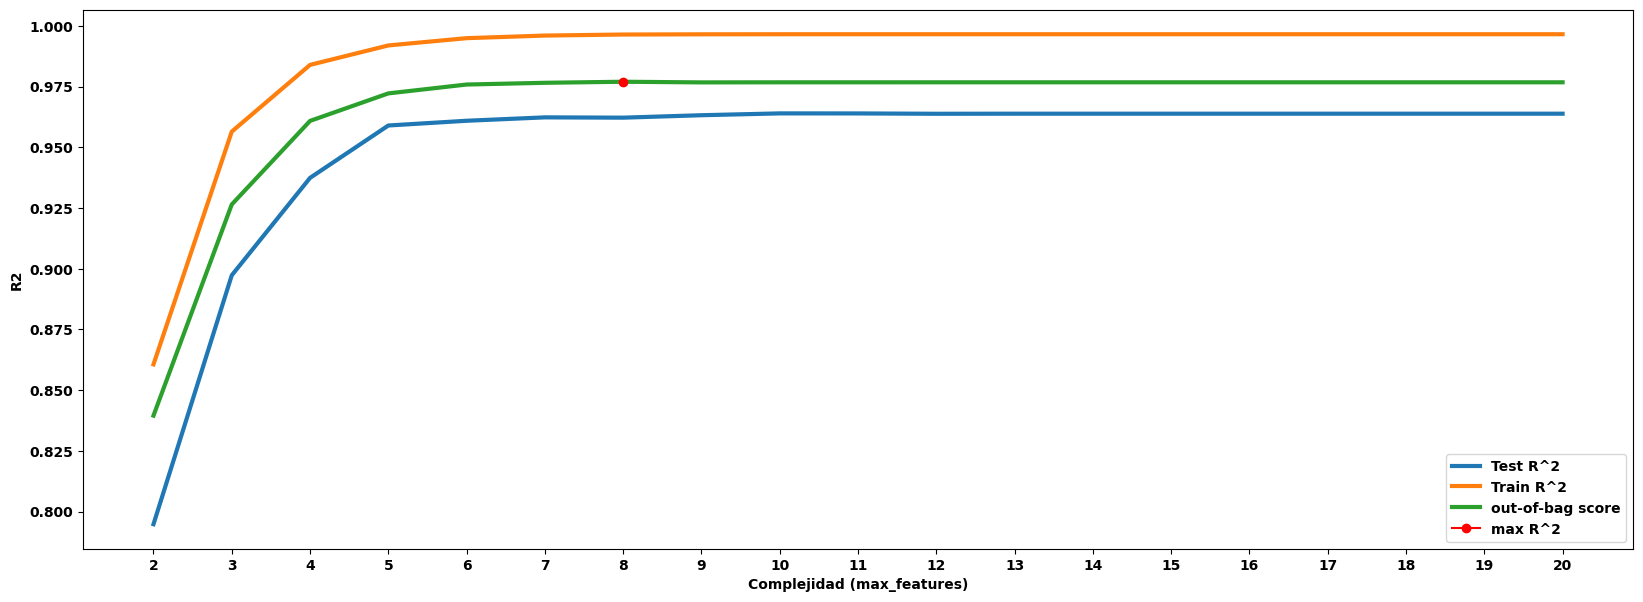

In [71]:
## Solución
# Ejercicio 9.2.2
'''**`9.2.2`** Saca la gráfica de *Model Complexity Curve* que dibuja la evolución de R_cuadrado de training, test y _OOB_ para el rango de profundidades de los árboles del bosque entre `2` y `20` **inclusive** considerando el número óptimo de los árboles estimado en el paso anterior (poniendo `random_state=77`). '''
hiperpar = np.arange(2,21)

entrenor2 = np.zeros(hiperpar.size)
pruebar2 = np.zeros(hiperpar.size)
oob_punt = np.zeros(hiperpar.size)

for i in range(hiperpar.size):
    bosque_9_2_2 = RandomForestRegressor(n_estimators=80, n_jobs=-1, oob_score=True,random_state=77, max_depth=hiperpar[i])
    bosque_9_2_2.fit(X_train_adv, y_train_adv)
    entrenor2[i] = r2_score(y_train_adv, bosque_9_2_2.predict(X_train_adv))
    pruebar2[i] = r2_score(y_test_adv, bosque_9_2_2.predict(X_test_adv))
    oob_punt[i] = bosque_9_2_2.oob_score_

print('El mejor valor de max_depth podría ser =', estimators[np.argmax(pruebar2)], ' que consigue un R2 =', max(pruebar2))

fig = plt.figure(figsize=(20,7))
plt.plot(hiperpar, pruebar2, linewidth=3, label='Test R^2')
plt.plot(hiperpar, entrenor2, linewidth=3, label='Train R^2')
plt.plot(hiperpar, oob_punt, linewidth=3, label='out-of-bag score')
plt.plot(hiperpar[np.argmax(oob_punt)], max(oob_punt),
        marker='o', color = "red", label="max R^2")
plt.xticks(hiperpar)
plt.xlabel('Complejidad (max_features)')
plt.ylabel('R2')
plt.legend(loc = 'lower right')
plt.show()

In [75]:
## Solución
# Ejercicio 9.2.3
'''**`9.2.3`** Para el modelo con los hiperparámetros óptimos que se intuyen de los pasos anteriores, Calcula diferentes métricas para evaluarlo y **analiza** su rendimiendo en comparación con el modelo inicial.    
    - MAE  
    - MAPE  
    - MSE  
    - RMSE  
    - $R^2$  
    - OOB $R^2$  '''
bosquefav = RandomForestRegressor(n_estimators=80,
                                  max_depth=100,
                                  n_jobs=-1,
                                  oob_score=True,
                                  random_state=77)
bosquefav.fit(X_train_adv, y_train_adv)
predi = bosquefav.predict(X_test_adv)

print('Mean Absolute Error:', mean_absolute_error(y_test_adv, predi))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_adv, predi)*100)
print('Mean Squared Error:', mean_squared_error(y_test_adv, predi))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_adv, predi)))
print('R^2 coefficient of determination:', r2_score(y_test_adv, predi))
print('R^2 of OOB:', bosquefav.oob_score_)

Mean Absolute Error: 0.7115937499999998
Mean Absolute Percentage Error: 5.701049823763902
Mean Squared Error: 0.8992434765624999
Root Mean Squared Error: 0.9482844913645376
R^2 coefficient of determination: 0.9638494721477107
R^2 of OOB: 0.9767769092275013


In [77]:
hiperparam = np.arange(1, X_train_adv.shape[1] + 1, 1)

train = np.zeros(hiperparam.size) 
test = np.zeros(hiperparam.size) 
oobscore = np.zeros(hiperparam.size)

for i in range(hiperparam.size):
    # Generamos un modelo para cada hiperparámetro, lo entrenamos y calculamos el R_cuadrado sobre datos de train y de test 
    modi_bosque = RandomForestRegressor(max_features=hiperparam[i],
                                       max_depth=100,
                                       n_estimators=80,
                                       n_jobs=-1,
                                       random_state=77,
                                       oob_score=True)
    modi_bosque.fit(X_train_adv, y_train_adv)
    train[i] = r2_score(y_train_adv, modi_bosque.predict(X_train_adv)) 
    test[i] = r2_score(y_test_adv, modi_bosque.predict(X_test_adv))
    oobscore[i] = modi_bosque.oob_score_   

print("El mejor valor de max_features podría ser =", hiperparam[np.argmax(oobscore)],
      " que consigue un R2 =", max(oobscore))

El mejor valor de max_features podría ser = 3  que consigue un R2 = 0.9767769092275013


In [79]:
def curva_aprendizaje_adv(n_arboles: int,
                         profundidad: int,
                         n_var: int):
    """Función para sacar la gráfica de Learning Curve a partir de los hiperparámetros del bosque"""

    # Generar la estructura del modelo
    modelo_bosque = RandomForestRegressor(n_estimators=int(n_arboles),
                                          max_depth=int(profundidad),
                                          max_features=int(n_var),
                                          oob_score=True,
                                          n_jobs=-1,
                                          random_state=77)
    
    # Crear un listado de los tamaños de subconjuntos de datos de entrenamiento
    num_samples = np.linspace(20,X_train_adv.shape[0]).astype(int)

    # Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento de los modelos
    train_R2 = np.zeros(num_samples.size) 
    test_R2 = np.zeros(num_samples.size)
    oob_score = np.zeros(num_samples.size)

    for i in range(num_samples.size):
        # Generamos un modelo para cada subconjunto de datos de entrenamiento y lo ajustamos  
        modelo_bosque.fit(X_train_adv[:num_samples[i]], y_train_adv[:num_samples[i]])

        # Calculamos el R_cuadrado sobre datos de train y de test
        train_R2[i] = r2_score(y_train_adv[:num_samples[i]], modelo_bosque.predict(X_train_adv[:num_samples[i]])) 
        test_R2[i] = r2_score(y_test_adv, modelo_bosque.predict(X_test_adv))
        oob_score[i] = modelo_bosque.oob_score_

    print("La diferencia de R^2 entre training y OOB es= ", train_R2[-1]-oob_score[-1])

    # Graficamos el R_cuadrado de training versus de test
    fig = plt.figure(figsize=(20,7))
    plt.plot(num_samples, test_R2, label = 'Test R^2')
    plt.plot(num_samples, train_R2, label = 'Train R^2')
    plt.plot(num_samples, oob_score, label = 'OOB R^2')
    plt.title('Curva de aprendizaje (Learning Curve) para max_features = %s' % n_var)
    plt.xlabel('Tamaño de entrenamiento (Training size)')
    plt.ylabel('R2')
    plt.legend(loc = 'lower right')
    plt.show()

La diferencia de R^2 entre training y OOB es=  0.019795602771095933


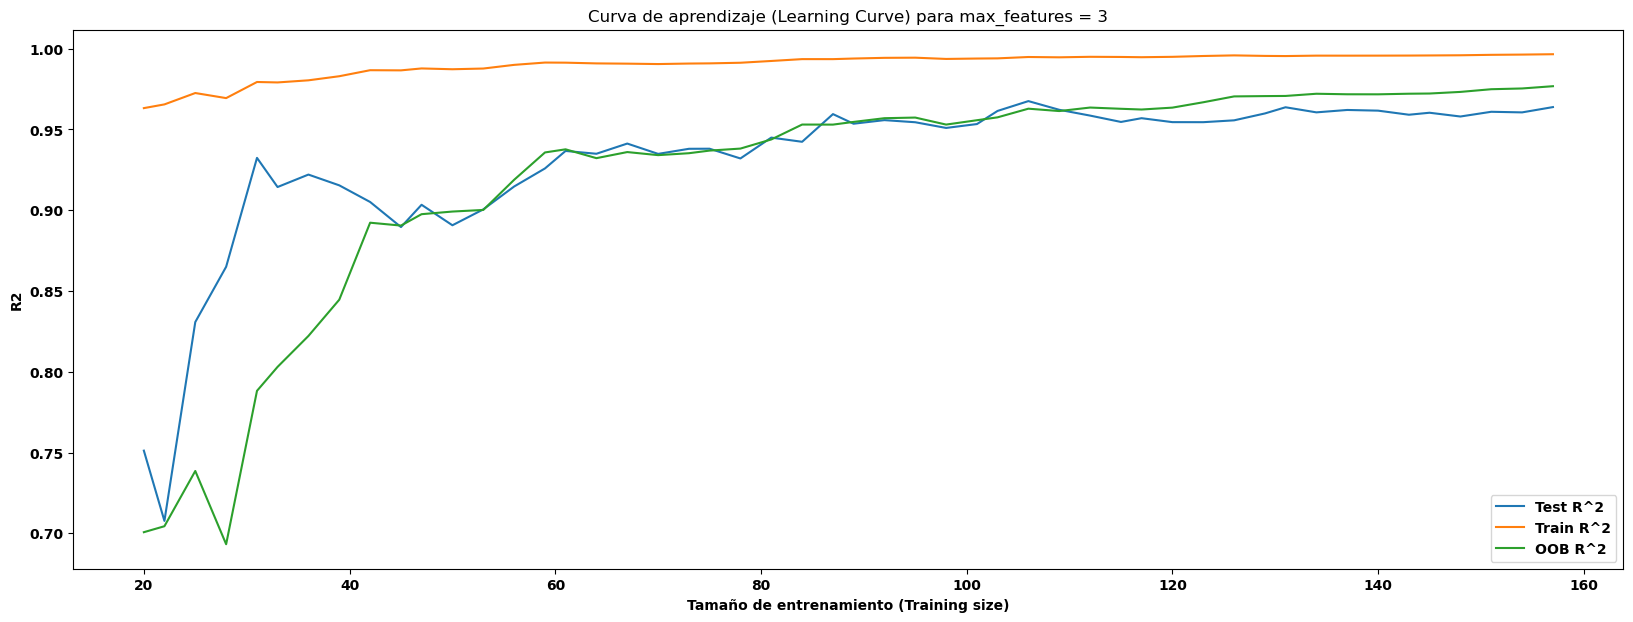

In [80]:
curva_aprendizaje_adv(n_arboles=80,
                     profundidad=100,
                     n_var=3)

#### CONCLUSIÓN
La diferencia entre R^2 en training y OOB nos podría indicar que el modelo tiene un ligero sobreajuste en el conjunto de entrenamiento, pero sería una diferencia muy pequeña.